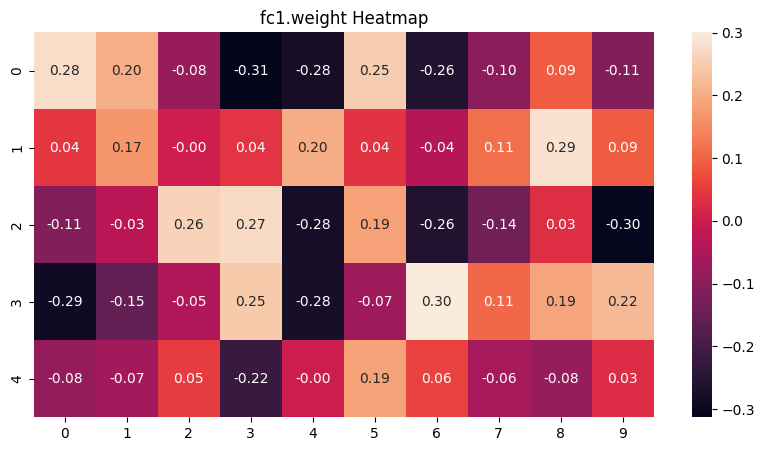

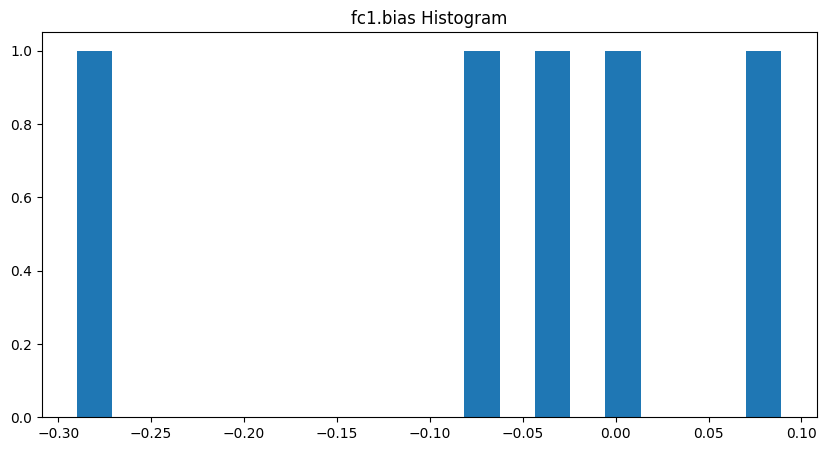

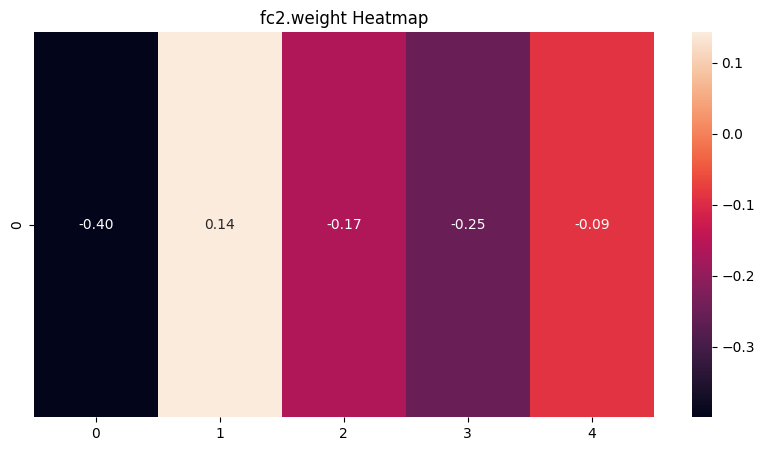

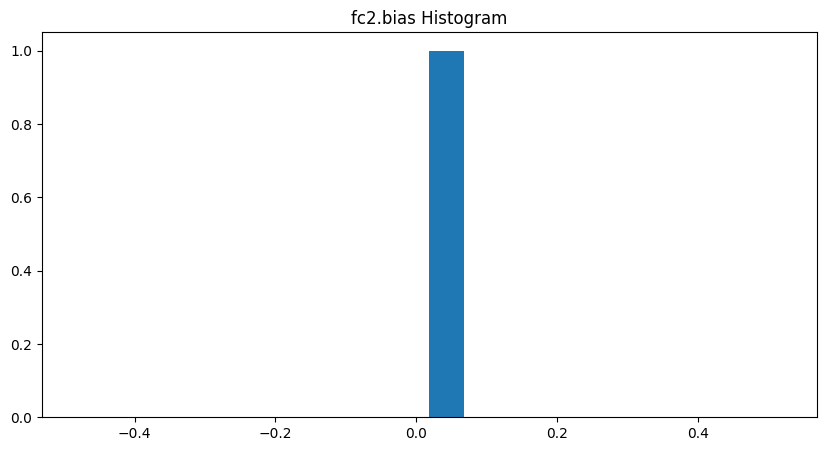

In [1]:
from visual_networks import *
from sample_networks import *
import torch


# Generate some random data
x = torch.randn(50, 10)

# Initialize and run the model
model = SimpleLinearModel()
y_pred = model(x)

# Visualize the model
visualize_model(model)


In [2]:
from visual import *
network = Network([15, 5,20,15,15,5,10])  # Example: 3 layers with 3, 4, and 2 neurons respectively
thread = Thread(target=run_glfw_window, args=(network,))
thread.start()

In [3]:
from tracking_objects import *
tracking_object()

FPS: 63
0.85875 0.9683333333333334
0.85375 0.96
0.85 0.9516666666666667
0.80375 0.8633333333333333
0.80125 0.8583333333333333
0.7975 0.8516666666666667
0.76375 0.7783333333333333
0.76125 0.7733333333333333
0.7375 0.715
0.73625 0.7133333333333334
0.72 0.675
0.71 0.655
0.70875 0.6533333333333333
0.70125 0.6416666666666667
0.7 0.6416666666666667
0.69625 0.635
0.695 0.6333333333333333
0.695 0.6316666666666667
0.695 0.63
0.69375 0.6216666666666667
0.6925 0.6083333333333333
0.68875 0.595
0.685 0.585
0.68375 0.585
0.68375 0.5833333333333334
0.67875 0.5783333333333334
0.6775 0.5783333333333334
0.66875 0.575
FPS: 60
0.65 0.5733333333333334
0.6225 0.585
0.62125 0.585
0.58375 0.6133333333333333
0.53875 0.6616666666666666
0.48625 0.7116666666666667
0.48375 0.7133333333333334
0.48 0.7183333333333334
0.47625 0.72
0.4325 0.75
0.43 0.7516666666666667
0.38875 0.7633333333333333
0.355 0.755
0.3525 0.7533333333333333
0.35 0.7516666666666667
0.3225 0.7233333333333334
0.32125 0.72
0.29375 0.681666666666666